# Initialise 

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [2]:
# %load_ext autoreload
# %autoreload 2
import c14
from c14 import livermodels as lm



In [3]:
data = pd.read_csv('../../../results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
# c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte" and pathology != "Y"')
edata = c14.exp_data(data)

In [4]:
m  = lm.Pl2p()

In [32]:
op = c14.optimize(model=m,data=edata,step_size=0.5)
vis= c14.visualisze(model=m,data=edata)
warnings.filterwarnings("ignore")

In [ ]:
res = op.optimize_minuit_multistart(mode='mcmc',steps=100,nwalkers=100,processes=2)

In [41]:
pe = res.sort_values('fval').loc[21]['values']
cov = res.sort_values('fval').loc[21]['cov']

In [49]:
errors = vis.calc_error(pe,cov)

In [43]:
cov

,delta2,delta4,kappa,lambda4
delta2,0.087508,-0.027126,-0.006100,0.000551
delta4,-0.027126,0.012282,0.001121,-0.000220
kappa,-0.006100,0.001121,1.999353,-0.000071
lambda4,0.000551,-0.000220,-0.000071,2.000003


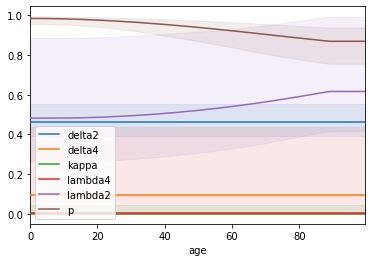

In [29]:
vis.plot_parameter(pe,errors,log=False)
plt.legend()
plt.show()

In [31]:
op.calc_aicc(pe)

-175.2002841623938